<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recognizing-characters-of-Devanagiri-Script" data-toc-modified-id="Recognizing-characters-of-Devanagiri-Script-1">Recognizing characters of Devanagiri Script</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1">Problem Statement</a></span></li></ul></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2">Executive Summary</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-3">Importing Libraries</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-4">Reading Data</a></span></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-5">Image Preprocessing</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-6">Model</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-6.1">Set up</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7">Conclusions</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-8">Next Steps</a></span></li></ul></div>

# Recognizing characters of Devanagiri Script

## Problem Statement

This project focuses on reviewing the existing methods for Character recognition of
handwritten characters using Machine Learning and applying those methods to recognize
handwritten characters of alphabets in the Hindi language, which has a  very different script from English, called the Devanagiri script. I will be using various classification models for this as well CNN. The model will be evaluated using the Accuracy score. 

![devanagiri script](images/devanagiri.png)

# Executive Summary

Data

The 92000 images of this dataset were generated by imaging the characters written by many individuals resulting in a wide variation in the way each character was written. Each of the dataset images of the characters is unique. The dataset is randomly split into a training set with 85% of the data and a testing set with 15% of the data. The Training Set consists of 78200 images and the training set consists of 13800 images. Each image is 32 x 32 pixels with the actual character centered within 28 x 28 pixels. 

Model and Results

Convolutional Neural Networks (CNN) were developed to make this classification. The model architecture that we used included 4 convolutional layers, We were able to achieve 98.2% accuracy by adding a pooling layer as well as including Drop at the cost of creating a slow model. 

# Importing Libraries

In [20]:
from PIL import Image
import time
import cv2
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.offline    as py


from keras                             import backend
from keras.preprocessing.image         import ImageDataGenerator
from keras.models    import Sequential
from keras.layers    import Dense, Dropout, Activation, Flatten
from keras.layers    import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from sklearn.metrics                   import confusion_matrix

#py.init_notebook_mode(connected=False) 
#cf.set_config_file(offline=True)
import random
random.seed(42)

# Reading Data

Downloading the train dataset and test dataset, which are in two different folders. The train folder contain 46 folders each containing 2000 images of respective classes. The test folder contains 46 folders with 300 images of the respective classes inside.

In [21]:
%matplotlib inline
train_path='./DevanagariHandwrittenCharacterDataset/Train'
test_path='./DevanagariHandwrittenCharacterDataset/Test'

# Image Preprocessing

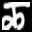

In [22]:
firstimage_train = Image.open('./DevanagariHandwrittenCharacterDataset/Train/character_1_ka/10965.png')
firstimage_train

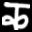

In [23]:
firstimage_test = Image.open('./DevanagariHandwrittenCharacterDataset/Test/character_1_ka/10964.png')
firstimage_test

Setting up train set and the test set. The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images. We are using flow_from directory method.

In [90]:
#Image Batches - Normalized Images

#Train
group = ['character_1_ka','character_2_kha',
            'character_3_ga','character_4_gha','character_5_kna','character_6_cha','character_7_chha','character_8_ja',
            'character_9_jha','character_10_yna','character_11_tta','character_12_ttha','character_13_dda','character_14_ddha',
            'character_15_adna','character_16_ta','character_17_thha','character_18_da','character_19_dha','character_20_na',
            'character_21_pa','character_22_pha','character_23_ba','character_24_bha','character_25_ma','character_26_ya',
            'character_27_ra','character_28_la','character_29_wa','character_30_sha','character_31_shha','character_32_sa',
            'character_33_ha','character_34_chha','character_35_tra','character_36_gya','digit_0','digit_1',
            'digit_2','digit_3','digit_4','digit_5','digit_6','digit_7','digit_8','digit_9']

train_batches=ImageDataGenerator().flow_from_directory(train_path,
                                                       target_size=(64,64),
                                                       classes=group,
                                                       class_mode ='categorical',
                                                       batch_size=30)

#Unshuffled Test, so we can make a confusion matrix easily later
test_batches=ImageDataGenerator().flow_from_directory(test_path,
                                                       target_size=(64,64),
                                                       classes=group,
                                                      class_mode ='categorical',
                                                      batch_size=30,shuffle=False)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [91]:
# Plot batches with labels

def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    
    #Format images
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    
    #Subplots and titles
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            
    #Show        
        plt.imshow(ims[i],interpolation=None if interp else 'none')

/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



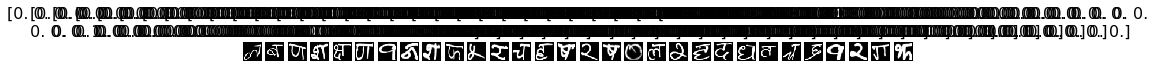

In [92]:
imgs,labels=next(train_batches)
plots(imgs, titles=labels);

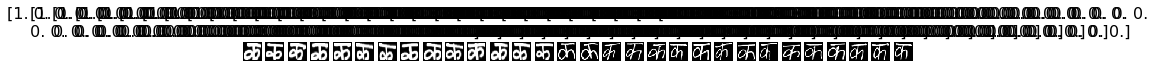

In [93]:
imgs,labels=next(test_batches)
plots(imgs, titles=labels);

In [94]:
np.unique(test_batches.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [95]:
np.unique(train_batches.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int32)

In [96]:
train_batches.class_indices

{'character_1_ka': 0,
 'character_2_kha': 1,
 'character_3_ga': 2,
 'character_4_gha': 3,
 'character_5_kna': 4,
 'character_6_cha': 5,
 'character_7_chha': 6,
 'character_8_ja': 7,
 'character_9_jha': 8,
 'character_10_yna': 9,
 'character_11_tta': 10,
 'character_12_ttha': 11,
 'character_13_dda': 12,
 'character_14_ddha': 13,
 'character_15_adna': 14,
 'character_16_ta': 15,
 'character_17_thha': 16,
 'character_18_da': 17,
 'character_19_dha': 18,
 'character_20_na': 19,
 'character_21_pa': 20,
 'character_22_pha': 21,
 'character_23_ba': 22,
 'character_24_bha': 23,
 'character_25_ma': 24,
 'character_26_ya': 25,
 'character_27_ra': 26,
 'character_28_la': 27,
 'character_29_wa': 28,
 'character_30_sha': 29,
 'character_31_shha': 30,
 'character_32_sa': 31,
 'character_33_ha': 32,
 'character_34_chha': 33,
 'character_35_tra': 34,
 'character_36_gya': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 'digit_6': 42,
 'digit_7': 43,

In [97]:
test_batches.class_indices

{'character_1_ka': 0,
 'character_2_kha': 1,
 'character_3_ga': 2,
 'character_4_gha': 3,
 'character_5_kna': 4,
 'character_6_cha': 5,
 'character_7_chha': 6,
 'character_8_ja': 7,
 'character_9_jha': 8,
 'character_10_yna': 9,
 'character_11_tta': 10,
 'character_12_ttha': 11,
 'character_13_dda': 12,
 'character_14_ddha': 13,
 'character_15_adna': 14,
 'character_16_ta': 15,
 'character_17_thha': 16,
 'character_18_da': 17,
 'character_19_dha': 18,
 'character_20_na': 19,
 'character_21_pa': 20,
 'character_22_pha': 21,
 'character_23_ba': 22,
 'character_24_bha': 23,
 'character_25_ma': 24,
 'character_26_ya': 25,
 'character_27_ra': 26,
 'character_28_la': 27,
 'character_29_wa': 28,
 'character_30_sha': 29,
 'character_31_shha': 30,
 'character_32_sa': 31,
 'character_33_ha': 32,
 'character_34_chha': 33,
 'character_35_tra': 34,
 'character_36_gya': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 'digit_6': 42,
 'digit_7': 43,

# Model 

## Set up

In [101]:
step_size_train=train_batches.n//train_batches.batch_size
step_size_train

2606

In [ ]:
step_size_test=test_batches.n//test_batches.batch_size

In [102]:
#Early stopping to regularize
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

#Instantiate model with 20% dropout to regularize
model=Sequential([
          Conv2D(filters=16,            # number of filters
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(64, 64, 3),
                strides =(1,1)),
         Conv2D(filters = 32,
               kernel_size =(5,5),
               activation = "relu"),
            MaxPooling2D(pool_size=(2, 2), strides = 2),
            Dropout(0.25),
        Conv2D(filters = 64,
              kernel_size = (3,3),
              strides = (1,1),
              activation = 'relu'),
        Conv2D(filters = 128,
              kernel_size =(3,3),
               strides =(1,1),
              activation = "relu"),
        MaxPooling2D(pool_size =(2,2), strides = 2),
        Dropout(0.5),
          Flatten(),
          Dense(256,activation='relu'),
          Dense(128, activation = 'relu'),
          Dense(46,activation='softmax')])

#Compile
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
%%time
#Fit
step_size_train=train_batches.n//train_batches.batch_size
step_size_test=test_batches.n//test_batches.batch_size
history=model.fit(train_batches,
          steps_per_epoch=step_size_train,
          validation_data=test_batches,
          epochs=20)
          #callbacks=[early_stop]

Epoch 1/20
2607/2607 [==============================] - 1266s 486ms/step - loss: 0.7331 - accuracy: 0.8029 - val_loss: 0.0733 - val_accuracy: 0.9342
Epoch 2/20
2607/2607 [==============================] - 1302s 499ms/step - loss: 0.2259 - accuracy: 0.9310 - val_loss: 0.0086 - val_accuracy: 0.9594
Epoch 3/20
2607/2607 [==============================] - 1375s 527ms/step - loss: 0.1604 - accuracy: 0.9501 - val_loss: 0.0057 - val_accuracy: 0.9662
Epoch 4/20
2607/2607 [==============================] - 1510s 579ms/step - loss: 0.1263 - accuracy: 0.9613 - val_loss: 0.0140 - val_accuracy: 0.9645
Epoch 5/20
2607/2607 [==============================] - 1483s 569ms/step - loss: 0.1091 - accuracy: 0.9665 - val_loss: 0.0958 - val_accuracy: 0.9707
Epoch 6/20
2607/2607 [==============================] - 1158s 444ms/step - loss: 0.0983 - accuracy: 0.9698 - val_loss: 0.2469 - val_accuracy: 0.9701
Epoch 7/20
2607/2607 [==============================] - 1142s 438ms/step - loss: 0.0876 - accuracy: 0.9731

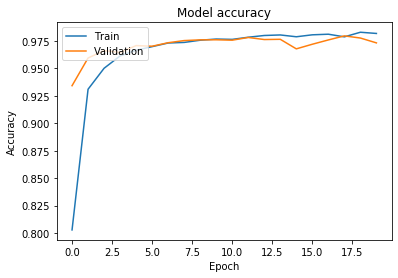

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

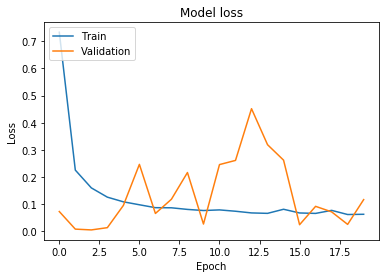

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [106]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 128)      

In [108]:
test_batches.reset()
preds = model.predict_generator(test_batches)
preds

array([[9.9856526e-01, 4.2067768e-07, 2.0931500e-07, ..., 9.4806062e-05,
        1.1268444e-12, 1.3873720e-09],
       [1.0000000e+00, 1.4729823e-11, 1.1352939e-16, ..., 7.9037356e-18,
        2.4959396e-30, 2.5935302e-19],
       [9.9986172e-01, 1.2870319e-05, 3.7502352e-07, ..., 1.5639915e-05,
        2.1131727e-12, 3.2429484e-06],
       ...,
       [8.1775025e-23, 5.2012810e-26, 1.7771351e-34, ..., 2.9665844e-20,
        3.5071373e-35, 1.0000000e+00],
       [3.3600396e-21, 1.1730804e-23, 3.1679401e-34, ..., 2.4564038e-19,
        4.1168338e-23, 9.9999976e-01],
       [4.1517283e-19, 1.3259502e-26, 1.9263620e-35, ..., 2.3784518e-18,
        9.2434801e-31, 1.0000000e+00]], dtype=float32)

In [109]:
len(preds[0])

46

In [110]:
preds[0]

array([9.9856526e-01, 4.2067768e-07, 2.0931500e-07, 5.8501306e-09,
       1.8371187e-06, 6.9251704e-10, 2.6980867e-11, 9.5569135e-09,
       1.3990629e-11, 3.5045278e-07, 4.0468710e-15, 6.1390347e-07,
       2.6501322e-08, 1.1752705e-06, 2.6014266e-13, 1.3180673e-13,
       7.4041732e-14, 3.3055368e-08, 2.9780497e-12, 4.5110674e-10,
       1.6837265e-12, 2.6096281e-08, 1.1607495e-03, 1.4653430e-09,
       3.1887672e-07, 7.4598550e-10, 2.1130599e-11, 4.6037968e-10,
       4.8039073e-08, 1.3038599e-09, 1.1248153e-08, 7.5832214e-12,
       6.4130326e-11, 4.1186679e-11, 4.9454169e-12, 7.1184492e-13,
       8.3446354e-11, 4.2837171e-15, 1.0173806e-06, 1.7308010e-04,
       1.7720745e-09, 1.4787834e-09, 8.5975689e-09, 9.4806062e-05,
       1.1268444e-12, 1.3873720e-09], dtype=float32)

In [127]:
y_pred = np.argmax(preds, axis = 1)
y_pred

array([ 0,  0,  0, ..., 45, 45, 45])

In [112]:
y_true = test_batches.classes

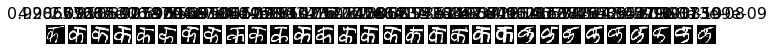

In [113]:
#A look at which images are misclassfied
imgs,labels=test_batches[1]
plots(imgs, titles=preds[0])

In [125]:
cm=confusion_matrix(y_true, y_pred)
cm
#ax= plt.subplot()
#plt.figure(figsize=(80,80))
#sns.heatmap(cm, ax = ax, fmt=".1f",cmap='ocean', cbar=False); 
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Enhanced', 'Not Enhanced']); ax.yaxis.set_ticklabels(['Enhanced', 'Not Enhanced']);

array([[295,   0,   0, ...,   0,   0,   0],
       [  0, 294,   0, ...,   0,   0,   0],
       [  0,   1, 298, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 299,   0,   0],
       [  0,   0,   0, ...,   0, 300,   0],
       [  0,   0,   0, ...,   1,   0, 296]])

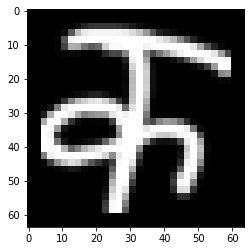

In [116]:
input_img=np.array(imgs[9]).astype(np.uint8)
plt.imshow(input_img)

In [117]:
y_true.shape

(13800,)

In [118]:
missed = np.arange(13800)[y_true != y_pred]

In [119]:
missed.shape

(370,)

0
11


ValueError: could not broadcast input array from shape (30,64,64,3) into shape (30)

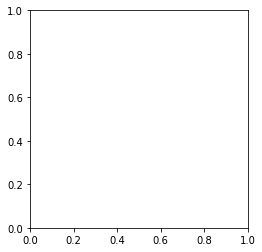

In [132]:
ix = 2
print(y_true[missed[ix]])
print(y_pred[missed[ix]])
plt.imshow(test_batches[missed[ix]]);

In [53]:
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

# Conclusions

# Next Steps